<a href="https://colab.research.google.com/github/vivek-varshney/Practice/blob/main/HR_DATA/HR_data_U2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/gauravpks/ml-repo/master/HRDS/unit2.csv

--2020-12-02 14:40:40--  https://raw.githubusercontent.com/gauravpks/ml-repo/master/HRDS/unit2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 260960 (255K) [text/plain]
Saving to: ‘unit2.csv.1’

unit2.csv.1         100%[===================>] 254.84K  --.-KB/s    in 0.04s   

2020-12-02 14:40:40 (6.43 MB/s) - ‘unit2.csv.1’ saved [260960/260960]



In [ ]:
u2 = pd.read_csv('unit2.csv')
u2

,Employee ID,Data Effective Date,Employee\nStatus\n,"Career Level \n(1=lowest, 6=highest)\n",Hired Date,Hired in FY\n(Yes/No),Termination Date,Terminated\nin FY\n(Yes/No),Termination Type\n(Voluntary or Involuntary Exit),Job Start Date,Promoted\nin FY\n(Yes/No),Birth Date,Age\n(Years),Tenure\n(Years),Time in\nJob (Years),"Rating\n(1=lowest, 5=highest)",Education\n(Highest\nDegree)
0,N0001,31-12-2016,Active,1,19-04-2016,Yes,NaN,No,NaN,19-04-2016,NaN,01-09-1995,NaN,NaN,NaN,3,MA/MS
1,N0002,31-12-2016,Active,1,19-10-2016,Yes,NaN,No,NaN,19-10-2016,NaN,13-09-1994,NaN,NaN,NaN,4,MA/MS
2,N0003,31-12-2016,Active,1,26-05-2016,Yes,NaN,No,NaN,26-05-2016,NaN,19-04-1996,NaN,NaN,NaN,3,BA/BS
3,N0004,31-12-2016,Active,1,19-10-2016,Yes,NaN,No,NaN,19-10-2016,NaN,21-01-1994,NaN,NaN,NaN,3,BA/BS
4,N0005,31-12-2016,Active,1,06-02-2016,Yes,NaN,No,NaN,06-02-2016,NaN,18-05-1993,NaN,NaN,NaN,3,BA/BS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,N2589,31-12-2016,Terminated,4,08-09-2004,No,09-03-2016,Yes,Voluntary Exit,27-12-2011,No,04-02-1986,NaN,NaN,NaN,2,MA/MS
2789,N2590,31-12-2016,Terminated,4,28-09-2005,No,28-09-2016,Yes,Involuntary Exit,10-06-2012,No,29-08-1984,NaN,NaN,NaN,2,BA/BS
2790,N2591,31-12-2016,Terminated,4,10-06-2006,No,15-01-2016,Yes,Involuntary Exit,03-11-2011,No,22-08-1987,NaN,NaN,NaN,2,MBA
2791,N2592,31-12-2016,Terminated,4,20-04-2006,No,02-07-2016,Yes,Involuntary Exit,13-09-2012,No,07-11-1988,NaN,NaN,NaN,2,BA/BS


In [ ]:
u2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 17 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Employee ID                                       2793 non-null   object 
 1   Data Effective Date                               2793 non-null   object 
 2   Employee
Status
                                  2793 non-null   object 
 3   Career Level 
(1=lowest, 6=highest)
              2793 non-null   int64  
 4   Hired Date                                        2793 non-null   object 
 5   Hired in FY
(Yes/No)                              2793 non-null   object 
 6   Termination Date                                  613 non-null    object 
 7   Terminated
in FY
(Yes/No)                         2793 non-null   object 
 8   Termination Type
(Voluntary or Involuntary Exit)  613 non-null    object 
 9   Job Start Date     

In [ ]:
u2.rename(columns={'Employee\nStatus\n':'Employee Status','Career Level \n(1=lowest, 6=highest)\n':'Career Level',
                   'Hired in FY\n(Yes/No)':'Hired in FY','Terminated\nin FY\n(Yes/No)':'Terminated',
                   'Termination Type\n(Voluntary or Involuntary Exit)':'Termination Type','Promoted\nin FY\n(Yes/No)':'Promoted',
                   'Age\n(Years)':'Age','Tenure\n(Years)':'Tenure','Time in\nJob (Years)':'Time in Job',
                   'Education\n(Highest\nDegree)':'Education','Rating\n(1=lowest, 5=highest)':'Rating'},inplace = True)
u2.head()

,Employee ID,Data Effective Date,Employee Status,Career Level,Hired Date,Hired in FY,Termination Date,Terminated,Termination Type,Job Start Date,Promoted,Birth Date,Age,Tenure,Time in Job,Rating,Education
0,N0001,31-12-2016,Active,1,19-04-2016,Yes,NaN,No,NaN,19-04-2016,NaN,01-09-1995,NaN,NaN,NaN,3,MA/MS
1,N0002,31-12-2016,Active,1,19-10-2016,Yes,NaN,No,NaN,19-10-2016,NaN,13-09-1994,NaN,NaN,NaN,4,MA/MS
2,N0003,31-12-2016,Active,1,26-05-2016,Yes,NaN,No,NaN,26-05-2016,NaN,19-04-1996,NaN,NaN,NaN,3,BA/BS
3,N0004,31-12-2016,Active,1,19-10-2016,Yes,NaN,No,NaN,19-10-2016,NaN,21-01-1994,NaN,NaN,NaN,3,BA/BS
4,N0005,31-12-2016,Active,1,06-02-2016,Yes,NaN,No,NaN,06-02-2016,NaN,18-05-1993,NaN,NaN,NaN,3,BA/BS


In [ ]:
u2['Data Effective Date'] = pd.to_datetime(u2['Data Effective Date'])
u2['Hired Date'] = pd.to_datetime(u2['Hired Date'])
u2['Job Start Date'] = pd.to_datetime(u2['Job Start Date'])
u2['Birth Date'] = pd.to_datetime(u2['Birth Date'])
u2['Termination Date'] = pd.to_datetime(u2['Termination Date'])

In [ ]:
u2['Age'] = (u2['Data Effective Date'].apply(lambda x : x.year) - u2['Birth Date'].apply(lambda x : x.year))
u2.head()

,Employee ID,Data Effective Date,Employee Status,Career Level,Hired Date,Hired in FY,Termination Date,Terminated,Termination Type,Job Start Date,Promoted,Birth Date,Age,Tenure,Time in Job,Rating,Education
0,N0001,2016-12-31,Active,1,2016-04-19,Yes,NaT,No,NaN,2016-04-19,NaN,1995-01-09,21,NaN,NaN,3,MA/MS
1,N0002,2016-12-31,Active,1,2016-10-19,Yes,NaT,No,NaN,2016-10-19,NaN,1994-09-13,22,NaN,NaN,4,MA/MS
2,N0003,2016-12-31,Active,1,2016-05-26,Yes,NaT,No,NaN,2016-05-26,NaN,1996-04-19,20,NaN,NaN,3,BA/BS
3,N0004,2016-12-31,Active,1,2016-10-19,Yes,NaT,No,NaN,2016-10-19,NaN,1994-01-21,22,NaN,NaN,3,BA/BS
4,N0005,2016-12-31,Active,1,2016-06-02,Yes,NaT,No,NaN,2016-06-02,NaN,1993-05-18,23,NaN,NaN,3,BA/BS


In [ ]:
u2['Tenure'] = (u2['Data Effective Date'].apply(lambda x : x.year) - u2['Hired Date'].apply(lambda x : x.year))
u2['Time in Job'] = (u2['Data Effective Date'].apply(lambda x : x.year)-u2['Job Start Date'].apply(lambda x : x.year))
u2.head()

,Employee ID,Data Effective Date,Employee Status,Career Level,Hired Date,Hired in FY,Termination Date,Terminated,Termination Type,Job Start Date,Promoted,Birth Date,Age,Tenure,Time in Job,Rating,Education
0,N0001,2016-12-31,Active,1,2016-04-19,Yes,NaT,No,NaN,2016-04-19,NaN,1995-01-09,21,0,0,3,MA/MS
1,N0002,2016-12-31,Active,1,2016-10-19,Yes,NaT,No,NaN,2016-10-19,NaN,1994-09-13,22,0,0,4,MA/MS
2,N0003,2016-12-31,Active,1,2016-05-26,Yes,NaT,No,NaN,2016-05-26,NaN,1996-04-19,20,0,0,3,BA/BS
3,N0004,2016-12-31,Active,1,2016-10-19,Yes,NaT,No,NaN,2016-10-19,NaN,1994-01-21,22,0,0,3,BA/BS
4,N0005,2016-12-31,Active,1,2016-06-02,Yes,NaT,No,NaN,2016-06-02,NaN,1993-05-18,23,0,0,3,BA/BS


In [ ]:
age_cnt = u2['Age'].value_counts()
age_cnt

28    244
27    242
26    229
29    211
25    197
22    194
30    191
23    191
24    168
31    135
32    101
33    100
34     97
21     80
35     73
37     55
36     42
39     35
38     31
40     25
42     23
48     15
47     14
51     12
41     12
43     10
20      9
46      9
49      9
45      9
54      7
53      6
52      6
44      4
50      4
57      1
55      1
56      1
Name: Age, dtype: int64

In [ ]:
def agegrp(x):
  if x<=20:
    group = 'Below 20'
  elif x>=21 and x<=30:
    group = '21-30'
  elif x>=31 and x<=40:
    group = '31-40'
  elif x>=41 and x<=50:
    group = '41-50'
  elif x>=51 and x<=60:
    group = '51-60'
  elif x>=61:
    group = 'Above 61'
  return group

In [ ]:
u2['Age Group'] = u2['Age'].apply(agegrp)
u2.head()

,Employee ID,Data Effective Date,Employee Status,Career Level,Hired Date,Hired in FY,Termination Date,Terminated,Termination Type,Job Start Date,Promoted,Birth Date,Age,Tenure,Time in Job,Rating,Education,Age Group
0,N0001,2016-12-31,Active,1,2016-04-19,Yes,NaT,No,NaN,2016-04-19,NaN,1995-01-09,21,0,0,3,MA/MS,21-30
1,N0002,2016-12-31,Active,1,2016-10-19,Yes,NaT,No,NaN,2016-10-19,NaN,1994-09-13,22,0,0,4,MA/MS,21-30
2,N0003,2016-12-31,Active,1,2016-05-26,Yes,NaT,No,NaN,2016-05-26,NaN,1996-04-19,20,0,0,3,BA/BS,Below 20
3,N0004,2016-12-31,Active,1,2016-10-19,Yes,NaT,No,NaN,2016-10-19,NaN,1994-01-21,22,0,0,3,BA/BS,21-30
4,N0005,2016-12-31,Active,1,2016-06-02,Yes,NaT,No,NaN,2016-06-02,NaN,1993-05-18,23,0,0,3,BA/BS,21-30


In [ ]:
agegrp_cnt = np.round(u2['Age Group'].value_counts(normalize = True)*100,2)
agegrp_cnt

21-30       69.71
31-40       24.85
41-50        3.90
51-60        1.22
Below 20     0.32
Name: Age Group, dtype: float64

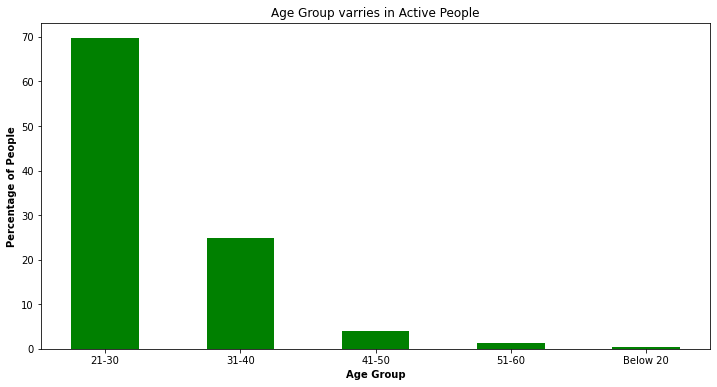

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(agegrp_cnt.keys().values,agegrp_cnt,color = 'green',width = 0.5)
plt.xlabel('Age Group',fontweight = 'bold')
plt.ylabel('Percentage of People',fontweight = 'bold')
plt.title('Age Group varries in Active People');

In [ ]:
actv_count = u2[u2['Employee Status']=='Active']
actv_count

,Employee ID,Data Effective Date,Employee Status,Career Level,Hired Date,Hired in FY,Termination Date,Terminated,Termination Type,Job Start Date,Promoted,Birth Date,Age,Tenure,Time in Job,Rating,Education,Age Group
0,N0001,2016-12-31,Active,1,2016-04-19,Yes,NaT,No,NaN,2016-04-19,NaN,1995-01-09,21,0,0,3,MA/MS,21-30
1,N0002,2016-12-31,Active,1,2016-10-19,Yes,NaT,No,NaN,2016-10-19,NaN,1994-09-13,22,0,0,4,MA/MS,21-30
2,N0003,2016-12-31,Active,1,2016-05-26,Yes,NaT,No,NaN,2016-05-26,NaN,1996-04-19,20,0,0,3,BA/BS,Below 20
3,N0004,2016-12-31,Active,1,2016-10-19,Yes,NaT,No,NaN,2016-10-19,NaN,1994-01-21,22,0,0,3,BA/BS,21-30
4,N0005,2016-12-31,Active,1,2016-06-02,Yes,NaT,No,NaN,2016-06-02,NaN,1993-05-18,23,0,0,3,BA/BS,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2718,N2176,2016-12-31,Active,6,1992-03-14,No,NaT,No,NaN,2008-01-07,No,1970-02-22,46,24,8,4,MBA,41-50
2719,N2177,2016-12-31,Active,6,1987-06-02,No,NaT,No,NaN,2007-08-08,No,1961-04-07,55,29,9,4,BA/BS,51-60
2720,N2178,2016-12-31,Active,6,1998-11-25,No,NaT,No,NaN,2008-06-02,No,1969-10-12,47,18,8,4,PhD,41-50
2721,N2179,2016-12-31,Active,6,1990-10-19,No,NaT,No,NaN,2007-04-20,No,1970-11-30,46,26,9,4,BA/BS,41-50


In [ ]:
termin_count = u2[u2['Employee Status']=='Terminated']
termin_count

,Employee ID,Data Effective Date,Employee Status,Career Level,Hired Date,Hired in FY,Termination Date,Terminated,Termination Type,Job Start Date,Promoted,Birth Date,Age,Tenure,Time in Job,Rating,Education,Age Group
300,N2181,2016-12-31,Terminated,1,2016-12-07,Yes,2016-10-30,Yes,Voluntary Exit,2016-12-07,NaN,1993-04-09,23,0,0,2,BA/BS,21-30
301,N2182,2016-12-31,Terminated,1,2016-04-21,Yes,2016-11-26,Yes,Voluntary Exit,2016-04-21,NaN,1996-05-15,20,0,0,2,BA/BS,Below 20
302,N2183,2016-12-31,Terminated,1,2015-06-10,Yes,2016-12-05,Yes,Voluntary Exit,2015-06-10,NaN,1992-09-22,24,1,1,2,MBA,21-30
303,N2184,2016-12-31,Terminated,1,2015-04-25,Yes,2016-11-02,Yes,Voluntary Exit,2015-04-25,NaN,1993-02-09,23,1,1,2,BA/BS,21-30
304,N2185,2016-12-31,Terminated,1,2015-08-05,Yes,2016-01-19,Yes,Voluntary Exit,2015-08-05,NaN,1993-04-03,23,1,1,2,BA/BS,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,N2589,2016-12-31,Terminated,4,2004-08-09,No,2016-09-03,Yes,Voluntary Exit,2011-12-27,No,1986-04-02,30,12,5,2,MA/MS,21-30
2789,N2590,2016-12-31,Terminated,4,2005-09-28,No,2016-09-28,Yes,Involuntary Exit,2012-10-06,No,1984-08-29,32,11,4,2,BA/BS,31-40
2790,N2591,2016-12-31,Terminated,4,2006-10-06,No,2016-01-15,Yes,Involuntary Exit,2011-03-11,No,1987-08-22,29,10,5,2,MBA,21-30
2791,N2592,2016-12-31,Terminated,4,2006-04-20,No,2016-02-07,Yes,Involuntary Exit,2012-09-13,No,1988-07-11,28,10,4,2,BA/BS,21-30


Active People

---



In [ ]:
crlvl_act_cnt = np.round(actv_count['Career Level'].value_counts(normalize = True)*100,1)[[1,2,3,4,5,6]]
crlvl_act_cnt

1    13.8
2    28.9
3    22.9
4    18.3
5    11.5
6     4.6
Name: Career Level, dtype: float64

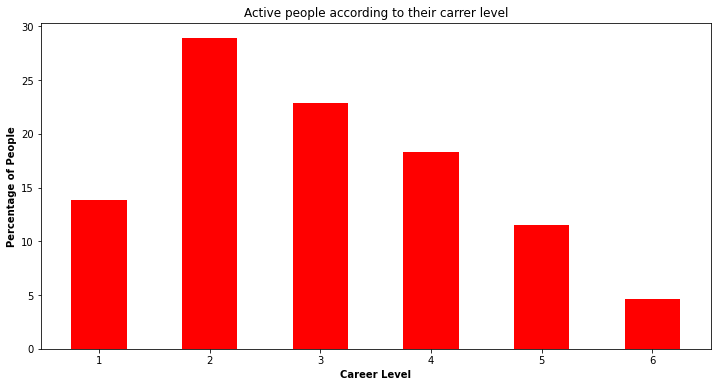

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(crlvl_act_cnt.keys().values,crlvl_act_cnt,color = 'red',width = 0.5)
plt.xlabel('Career Level',fontweight = 'bold')
plt.ylabel('Percentage of People',fontweight = 'bold')
plt.title('Active people according to their carrer level');

In [ ]:
age_act_cnt = actv_count['Age'].value_counts()
age_act_cnt

26    190
27    180
22    176
28    171
25    163
23    162
29    152
30    140
24    137
31     93
32     76
21     74
33     68
34     67
35     53
37     42
36     30
39     29
38     25
40     22
42     16
48     15
47     14
49      9
46      9
45      9
43      9
41      9
51      8
20      8
54      6
52      5
53      5
50      4
44      3
55      1
Name: Age, dtype: int64

In [ ]:
agegrp_act_cnt = np.round(actv_count['Age Group'].value_counts(normalize = True)*100,2)
agegrp_act_cnt

21-30       70.87
31-40       23.17
41-50        4.45
51-60        1.15
Below 20     0.37
Name: Age Group, dtype: float64

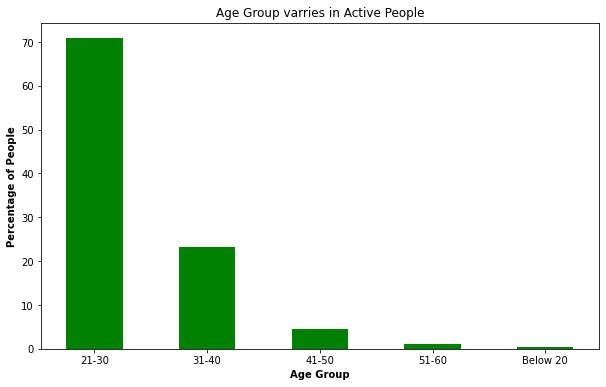

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(agegrp_act_cnt.keys().values,agegrp_act_cnt,color = 'green',width = 0.5)
plt.xlabel('Age Group',fontweight = 'bold')
plt.ylabel('Percentage of People',fontweight = 'bold')
plt.title('Age Group varries in Active People');

In [ ]:
edu_act_cnt = np.round(actv_count['Education'].value_counts(normalize = True)*100,2)
edu_act_cnt

BA/BS    44.31
MBA      24.63
MA/MS    23.99
PhD       4.77
JD        2.29
Name: Education, dtype: float64

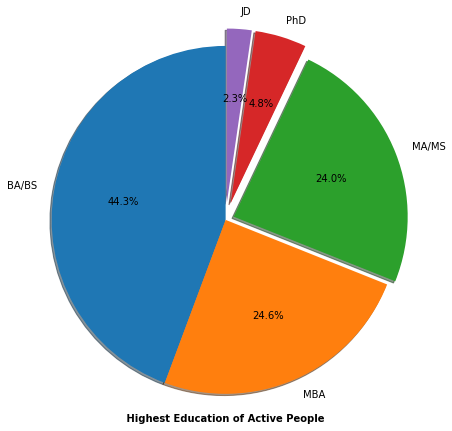

In [ ]:
plt.pie(edu_act_cnt.values,radius = 2,labels=edu_act_cnt.keys().values,explode=(0,0,0.1,0.2,0.2),shadow=True,
        autopct='%.1f%%',startangle = 90)
plt.xlabel('\n\n\n\n\n\n\n Highest Education of Active People ',fontweight = 'bold');

In [ ]:
rtng_act_cnt = np.round(actv_count['Rating'].value_counts(normalize = True)*100,1)[[3,4,5]]
rtng_act_cnt

3    29.4
4    41.0
5    29.7
Name: Rating, dtype: float64

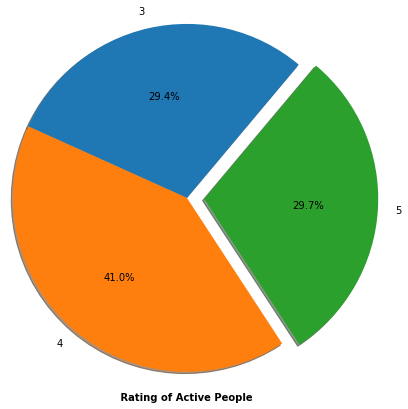

In [ ]:
plt.pie(rtng_act_cnt.values,radius = 2,labels=rtng_act_cnt.keys().values,explode=(0,0,0.2),shadow=True,
        autopct='%.1f%%',startangle = 50)
plt.xlabel('\n\n\n\n\n\n\n Rating of Active People ',fontweight = 'bold');

In [ ]:
prmt_cnt = actv_count['Promoted'].value_counts()
prmt_cnt

No     1213
Yes     667
Name: Promoted, dtype: int64

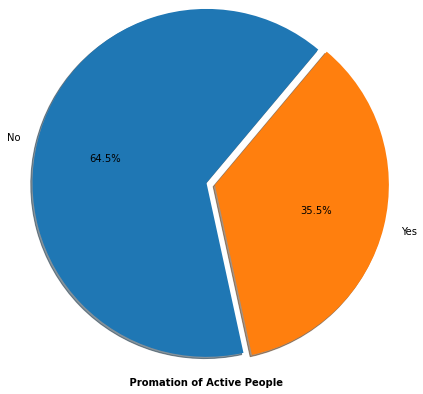

In [ ]:
plt.pie(prmt_cnt.values,radius = 2,labels=prmt_cnt.keys().values,explode=(0,0.1),shadow=True,
        autopct='%.1f%%',startangle = 50)
plt.xlabel('\n\n\n\n\n\n\n Promation of Active People ',fontweight = 'bold');

Terminted people

---



In [ ]:
crlvl_ter_cnt = np.round(termin_count['Career Level'].value_counts(normalize = True)*100,1)[[1,2,3,4,5,6]]
crlvl_ter_cnt

1     7.3
2    25.8
3    24.5
4    32.6
5     8.2
6     1.6
Name: Career Level, dtype: float64

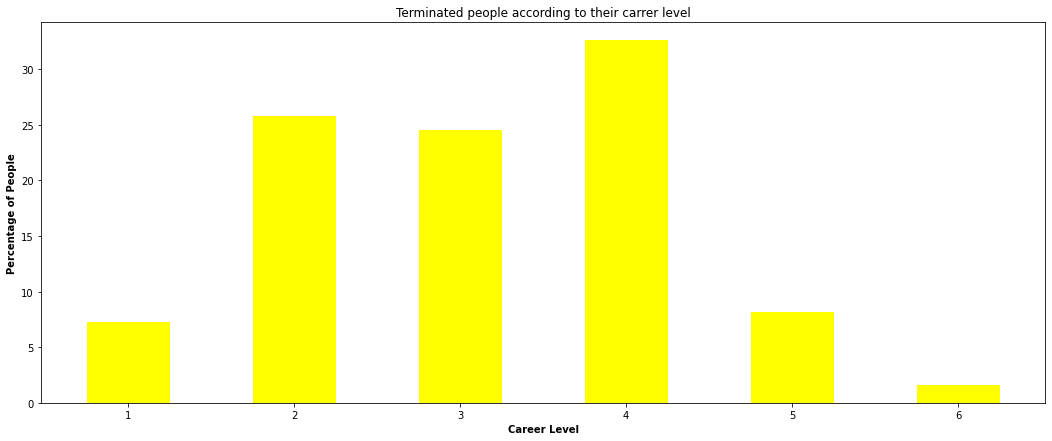

In [ ]:
plt.figure(figsize=(18,7))
plt.bar(crlvl_ter_cnt.keys().values,crlvl_ter_cnt,color = 'yellow',width = 0.5)
plt.xlabel('Career Level',fontweight = 'bold')
plt.ylabel('Percentage of People',fontweight = 'bold')
plt.title('Terminated people according to their carrer level');

In [ ]:
agegrp_ter_cnt = np.round(termin_count['Age Group'].value_counts(normalize = True)*100,2)
agegrp_ter_cnt

21-30       65.58
31-40       30.83
41-50        1.96
51-60        1.47
Below 20     0.16
Name: Age Group, dtype: float64

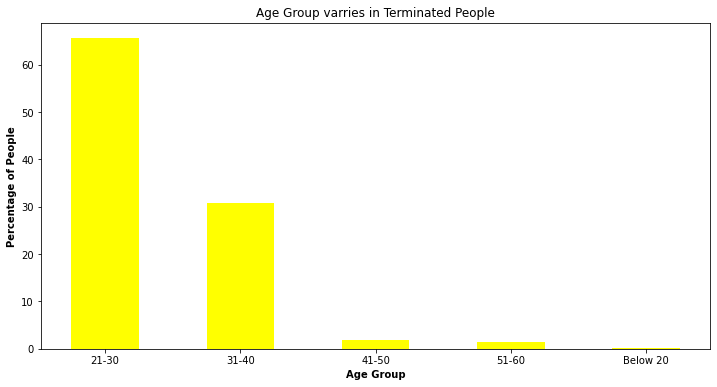

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(agegrp_ter_cnt.keys().values,agegrp_ter_cnt,color = 'yellow',width = 0.5)
plt.xlabel('Age Group', fontweight = 'bold')
plt.ylabel('Percentage of People', fontweight = 'bold')
plt.title('Age Group varries in Terminated People');

In [ ]:
edu_ter_cnt = np.round(termin_count['Education'].value_counts(normalize = True)*100,2)
edu_ter_cnt

BA/BS    38.50
MA/MS    28.38
MBA      23.16
PhD       6.36
JD        3.59
Name: Education, dtype: float64

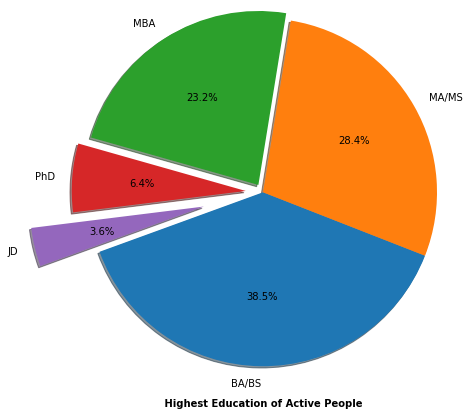

In [ ]:
plt.pie(edu_ter_cnt.values,radius = 2,labels=edu_ter_cnt.keys().values,explode=(0,0,0.1,0.2,0.7),shadow=True,
        autopct='%.1f%%',startangle = 200)
plt.xlabel('\n\n\n\n\n\n\n\n Highest Education of Active People ',fontweight = 'bold');

In [ ]:
rtng_ter_cnt = np.round(termin_count['Rating'].value_counts(normalize = True)*100,1)[[1,2,3]]
rtng_ter_cnt

1     3.3
2    80.4
3    16.3
Name: Rating, dtype: float64

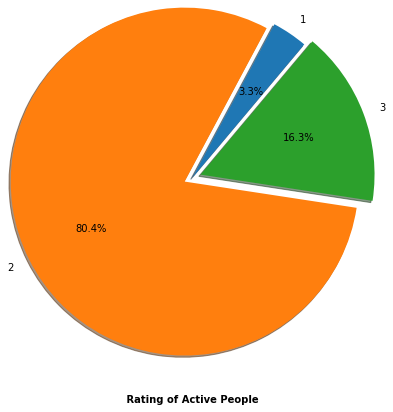

In [ ]:
plt.pie(rtng_ter_cnt.values,radius = 2,labels=rtng_ter_cnt.keys().values,explode=(0,0.1,0.1),shadow=True,
        autopct='%.1f%%',startangle = 50)
plt.xlabel('\n\n\n\n\n\n\n\n\n Rating of Active People ',fontweight = 'bold');

In [ ]:
tertyp_cnt = termin_count['Termination Type'].value_counts()
tertyp_cnt

Involuntary Exit    385
Voluntary Exit      228
Name: Termination Type, dtype: int64

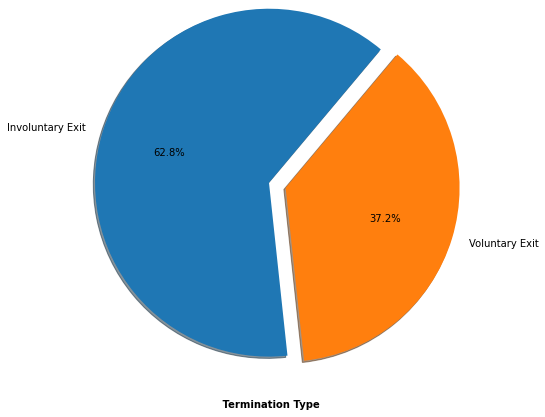

In [ ]:
plt.pie(tertyp_cnt.values,radius = 2,labels=tertyp_cnt.keys().values,explode=(0,0.2),shadow=True,
        autopct='%.1f%%',startangle = 50)
plt.xlabel('\n\n\n\n\n\n\n\n\n Termination Type',fontweight = 'bold');

In [ ]:
u2.head()

,Employee ID,Data Effective Date,Employee Status,Career Level,Hired Date,Hired in FY,Termination Date,Terminated,Termination Type,Job Start Date,Promoted,Birth Date,Age,Tenure,Time in Job,Rating,Education,Age Group
0,N0001,2016-12-31,Active,1,2016-04-19,Yes,NaT,No,NaN,2016-04-19,NaN,1995-01-09,21,0,0,3,MA/MS,21-30
1,N0002,2016-12-31,Active,1,2016-10-19,Yes,NaT,No,NaN,2016-10-19,NaN,1994-09-13,22,0,0,4,MA/MS,21-30
2,N0003,2016-12-31,Active,1,2016-05-26,Yes,NaT,No,NaN,2016-05-26,NaN,1996-04-19,20,0,0,3,BA/BS,Below 20
3,N0004,2016-12-31,Active,1,2016-10-19,Yes,NaT,No,NaN,2016-10-19,NaN,1994-01-21,22,0,0,3,BA/BS,21-30
4,N0005,2016-12-31,Active,1,2016-06-02,Yes,NaT,No,NaN,2016-06-02,NaN,1993-05-18,23,0,0,3,BA/BS,21-30


Mix data

---



In [ ]:
u2[['Tenure','Time in Job']]

,Tenure,Time in Job
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2788,12,5
2789,11,4
2790,10,5
2791,10,4


In [ ]:
prcnt = lambda x : np.round(x/x.sum() * 100)
tm_dif_cnt = u2.groupby(['Tenure','Time in Job'])['Tenure'].count().unstack().apply(prcnt,axis = 1)
tm_dif_cnt

Time in Job,0,1,2,3,4,5,6,7,8,9,10,11,12
Tenure,,,,,,,,,,,,,
0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,24.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,50.0,47.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.0,35.0,49.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,24.0,14.0,33.0,30.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,31.0,NaN,28.0,38.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,26.0,NaN,11.0,36.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,18.0,NaN,NaN,32.0,46.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
prcnt = lambda x: np.round(x/x.sum() * 100)
agegrp_lvl_cnt  = u2.groupby(['Age Group','Career Level'])['Age Group'].count().unstack().apply(prcnt,axis = 1)
agegrp_lvl_cnt

Career Level,1,2,3,4,5,6
Age Group,,,,,,
21-30,17.0,40.0,31.0,11.0,0.0,NaN
31-40,NaN,NaN,6.0,56.0,37.0,0.0
41-50,NaN,NaN,NaN,NaN,32.0,68.0
51-60,NaN,NaN,NaN,NaN,NaN,100.0
Below 20,100.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
agegrp_lvl_cnt[1].keys().values

array(['21-30', '31-40', '41-50', '51-60', 'Below 20'], dtype=object)

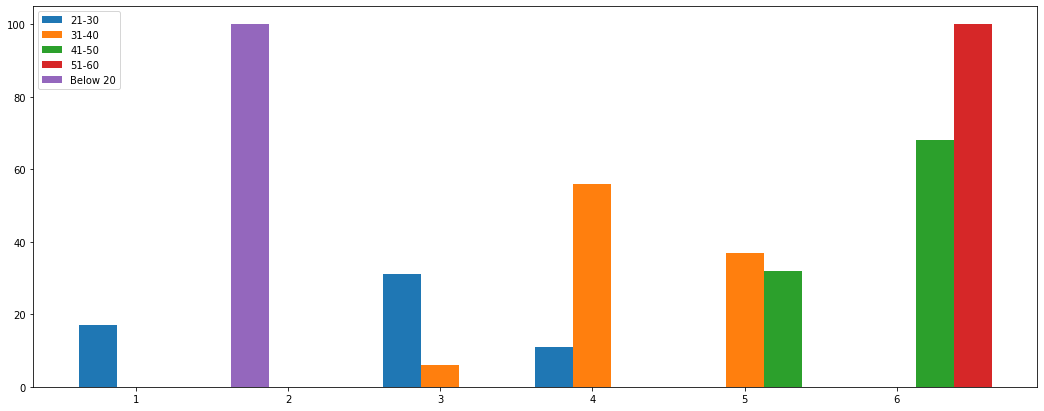

In [ ]:
fig  = plt.figure(figsize=(18,7))
barWidth  = 0.25

bar1 = agegrp_lvl_cnt.to_numpy()[0]
bar2 = agegrp_lvl_cnt.to_numpy()[1]
bar3 = agegrp_lvl_cnt.to_numpy()[2]
bar4 = agegrp_lvl_cnt.to_numpy()[3]
bar5 = agegrp_lvl_cnt.to_numpy()[4]


r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]


plt.bar(r1,bar1, width=barWidth, label=agegrp_lvl_cnt[1].keys().values[0])
plt.bar(r2,bar2, width=barWidth, label=agegrp_lvl_cnt[1].keys().values[1])
plt.bar(r3,bar3, width=barWidth, label=agegrp_lvl_cnt[1].keys().values[2])
plt.bar(r4,bar4, width=barWidth, label=agegrp_lvl_cnt[1].keys().values[3])
plt.bar(r5,bar5, width=barWidth, label=agegrp_lvl_cnt[1].keys().values[4])

plt.xticks([r + barWidth for r in range(len(bar1))],agegrp_lvl_cnt.keys().values)

plt.legend()
plt.show()

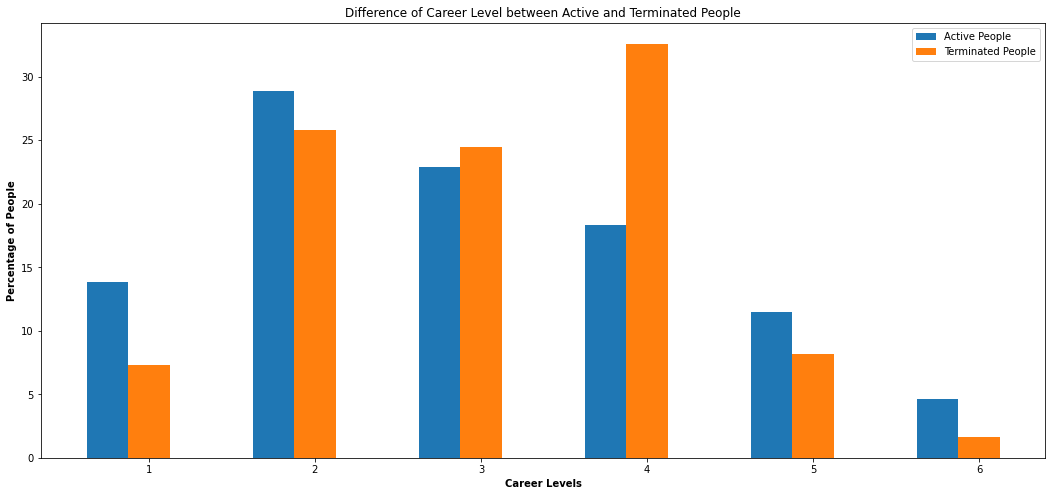

In [ ]:
plt.figure(figsize=(18,8))
barWidth = 0.25

barr1 = crlvl_act_cnt.to_numpy()
barr2 = crlvl_ter_cnt.to_numpy()

rr1 = np.arange(len(bar1))
rr2 = [x + barWidth for x in rr1]

plt.bar(rr1,barr1,width=barWidth, label = 'Active People')
plt.bar(rr2,barr2,width=barWidth, label = 'Terminated People')

plt.xlabel('Career Levels',fontweight = 'bold')
plt.ylabel('Percentage of People',fontweight = 'bold')
plt.title('Difference of Career Level between Active and Terminated People')
plt.xticks([r + barWidth for r in range(len(barr1))], crlvl_act_cnt.keys().values)

plt.legend()
plt.show()

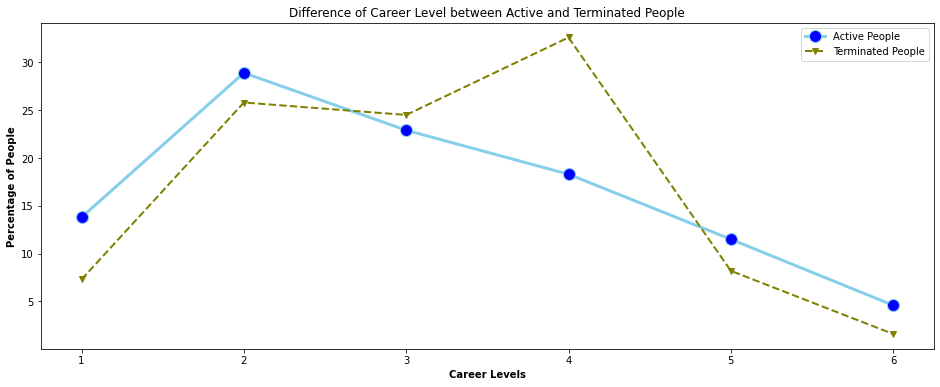

In [ ]:
fig = plt.figure(figsize = (16, 6))

plt.plot( crlvl_act_cnt.keys().values, crlvl_act_cnt.values, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=3,label = 'Active People')
plt.plot( crlvl_ter_cnt.keys().values, crlvl_ter_cnt.values, marker='v', color='olive' , linewidth=2, linestyle='dashed',label = 'Terminated People')

plt.xlabel('Career Levels',fontweight = 'bold')
plt.ylabel('Percentage of People',fontweight = 'bold')
plt.title('Difference of Career Level between Active and Terminated People')

plt.xticks(crlvl_ter_cnt.keys().values)

plt.legend();